<a href="https://colab.research.google.com/github/leemutai/Intro_to_datascience/blob/main/auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from google.colab import files


In [34]:
# Upload file
uploaded = files.upload()


Saving IRIS.csv to IRIS (1).csv


In [35]:

# Load the Iris dataset
iris = pd.read_csv(next(iter(uploaded.keys())))

In [36]:
# Separate features and target labels
features = iris.drop(columns=['species'])
target = iris['species']

In [37]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [38]:

# Define the autoencoder model
input_dim = features_scaled.shape[1]  # Number of input features
encoding_dim = 2  # Dimensionality of the encoding layer

In [39]:
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

In [40]:

autoencoder = Model(inputs=input_layer, outputs=decoder)
encoder_model = Model(inputs=input_layer, outputs=encoder)

In [41]:
autoencoder.compile(optimizer='sgd', loss='mse')

In [42]:
# Train the autoencoder
X_train, X_test = train_test_split(features_scaled, test_size=0.2, random_state=42)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, validation_data=(X_test, X_test), verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 1.2180 - val_loss: 1.1137
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 1.2125 - val_loss: 1.1083
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 1.2069 - val_loss: 1.1033
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 1.2016 - val_loss: 1.0982
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 1.1962 - val_loss: 1.0929
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 1.1905 - val_loss: 1.0876
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 1.1849 - val_loss: 1.0825
Epoch 8/50
8/8 [==============================] - 0s 6ms/step - loss: 1.1795 - val_loss: 1.0776
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 1.1743 - val_loss: 1.0728
Epoch 10/50
8/8 [==============================] - 0s 8ms/step - loss: 1.1691 - val_loss: 1.0676
Epoch 11/50
8/8 [=====================

In [43]:

# Encode the data
X_encoded = encoder_model.predict(features_scaled)

5/5 [==============================] - 0s 3ms/step


In [44]:
# Perform K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


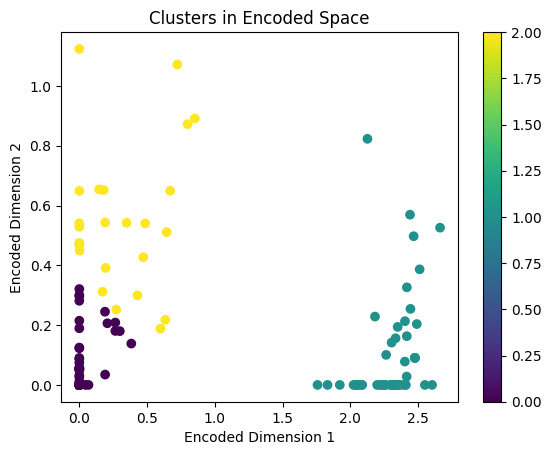

In [45]:
# Visualize the clusters
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Encoded Dimension 1')
plt.ylabel('Encoded Dimension 2')
plt.title('Clusters in Encoded Space')
plt.colorbar()
plt.show()

In [46]:

# Calculate silhouette score
silhouette_avg = silhouette_score(X_encoded, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.7242141962051392
